In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv("/content/drive/MyDrive/dataset/Iris (1).csv")

In [44]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df=df.drop('Id',axis=1)

<Axes: xlabel='count', ylabel='Species'>

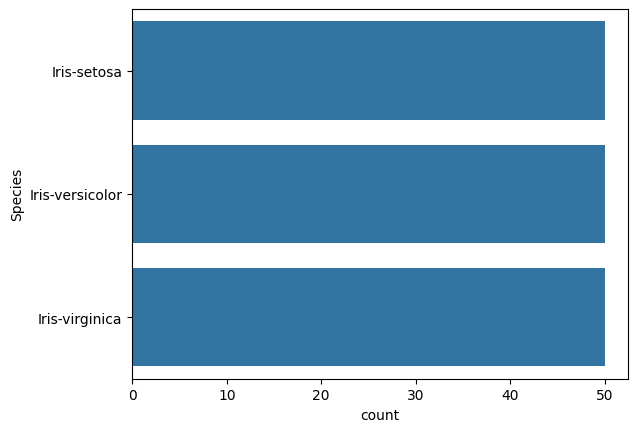

In [48]:
sns.countplot(y='Species',data=df)

In [49]:
num_cols=df.select_dtypes(include=['int','float']).columns

/tmp/ipython-input-50-3344395495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


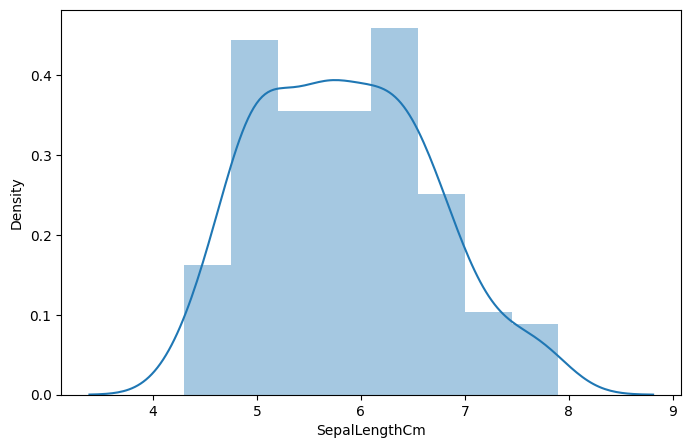

/tmp/ipython-input-50-3344395495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


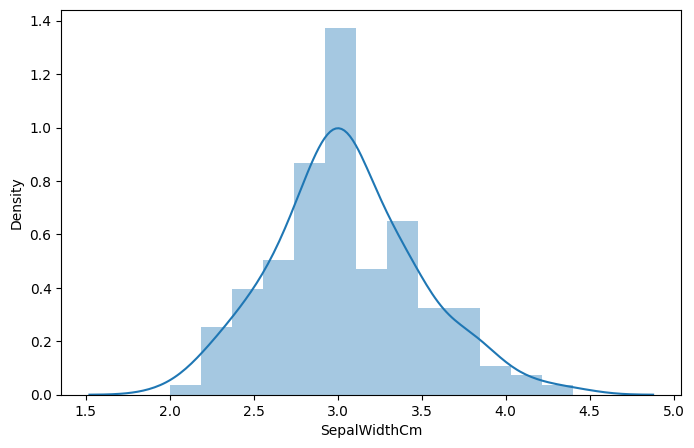

/tmp/ipython-input-50-3344395495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


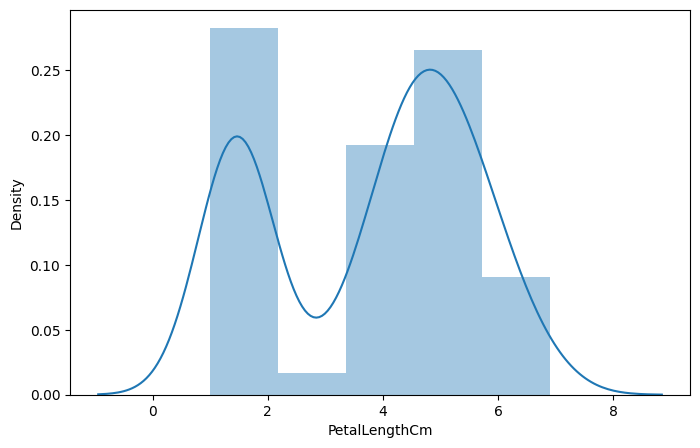

/tmp/ipython-input-50-3344395495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


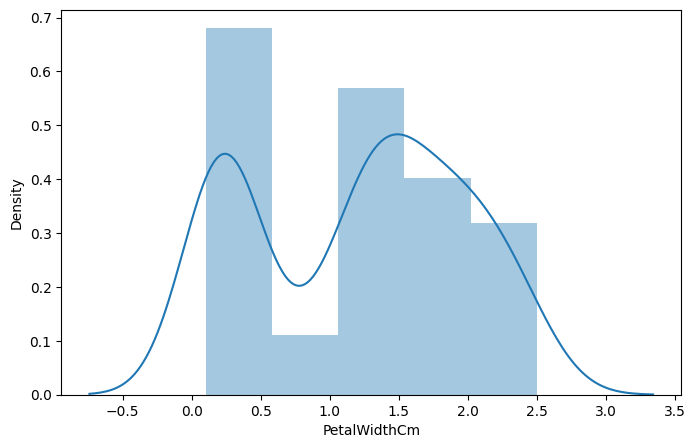

In [50]:
for col in num_cols:
  plt.figure(figsize=(8,5))
  sns.distplot(df[col])
  plt.show()

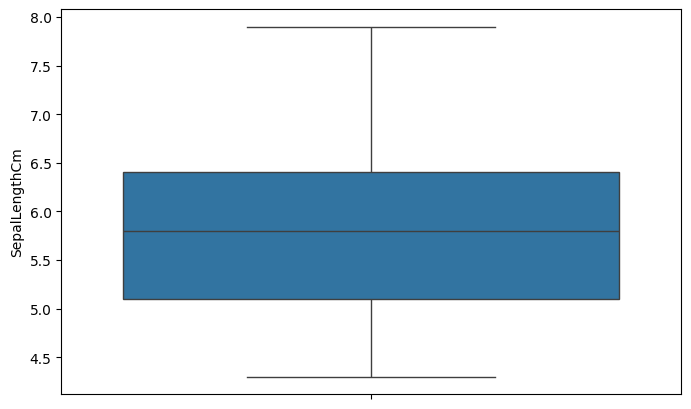

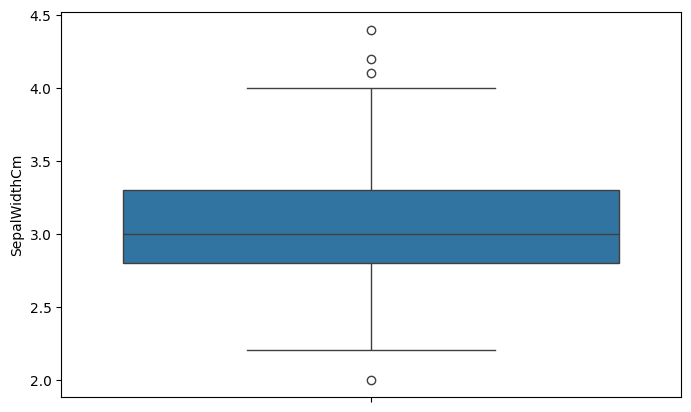

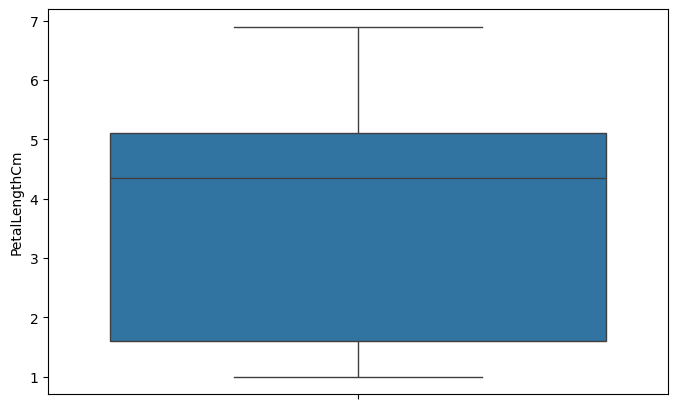

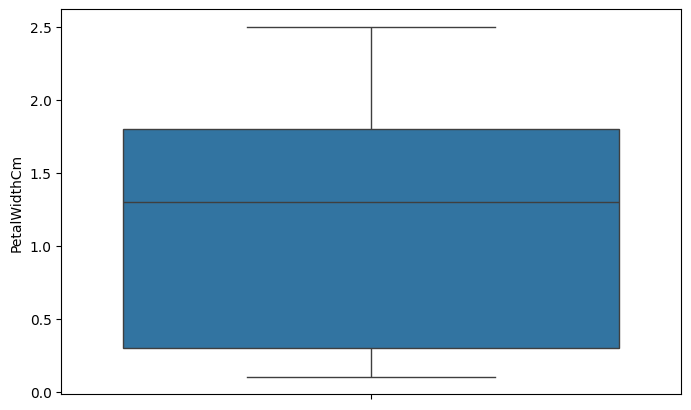

In [51]:
for col in num_cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(y=df[col],data=df)
  plt.show()

In [52]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
lr=LabelEncoder()

In [55]:
df['Species']=lr.fit_transform(df['Species'])

In [56]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
X=df.drop('Species',axis=1)
y=df['Species']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [61]:
from  sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr=LogisticRegression()

In [66]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [67]:
y_pred=lr.predict(x_test_scaled)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
accuracy_score(y_test,y_pred)

1.0

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rs=RandomForestClassifier()

In [72]:
rs.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [73]:
y_pred=rs.predict(x_test_scaled)

In [74]:
accuracy_score(y_test,y_pred)

1.0

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [79]:
train_pred = rs.predict(x_train_scaled)

print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy : 1.0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [84]:
test_input=pd.DataFrame({'SepalLengthCm':[5.1],'SepalWidthCm':[3.5],'PetalLengthCm':[1.4],'PetalWidthCm':[0.2]})
test_input=sc.transform(test_input)

In [85]:
lr.predict(test_input)

array([0])

In [86]:
rs.predict(test_input)

array([0])